# Introduction
### The Credit Card Customer Data dataset contains demographic and behavioral information of credit card users, including age, income, spending score, and credit card usage. It is ideal for segmentation and clustering analysis, helping to identify customer groups for targeted marketing, risk assessment, and service personalization in financial services.With redgarding to this dataset to perform K Means method to find the accuracy.

### Importing all libraries

In [1]:
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
df=pd.read_csv(r"E:\Datascience\Data set\Credit Card Customer Data.csv")


### Printing the first 20 rows

In [2]:
print(df.head(20))

    Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0       1         87073            100000                   2   
1       2         38414             50000                   3   
2       3         17341             50000                   7   
3       4         40496             30000                   5   
4       5         47437            100000                   6   
5       6         58634             20000                   3   
6       7         48370            100000                   5   
7       8         37376             15000                   3   
8       9         82490              5000                   2   
9      10         44770              3000                   4   
10     11         52741             10000                   4   
11     12         52326             13000                   3   
12     13         92503             11000                   1   
13     14         25084              9000                   1   
14     15         68517  

### Data Cleaning

In [3]:
df=pd.read_csv(r"E:\Datascience\Data set\Credit Card Customer Data.csv")
df.columns = [col.replace(" ", "_") for col in df.columns]
df.dropna(inplace=True)
numeric_column = 'numeric_column'
if numeric_column in df.columns:
    df[numeric_column].fillna(df[numeric_column].mean(), inplace=True)
categorical_column = 'categorical_column'
if categorical_column in df.columns:
    df[categorical_column].fillna('Unknown', inplace=True)
df.drop_duplicates(inplace=True)
print(df.shape)
df.isna().sum()
df.info()

(660, 7)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer_Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 41.2 KB


### Checking for duplicates

In [4]:
print(df.duplicated().sum())

0


### Statistical Analysis

            Sl_No  Customer_Key  Avg_Credit_Limit  Total_Credit_Cards  \
count  660.000000    660.000000        660.000000          660.000000   
mean   330.500000  55141.443939      34574.242424            4.706061   
std    190.669872  25627.772200      37625.487804            2.167835   
min      1.000000  11265.000000       3000.000000            1.000000   
25%    165.750000  33825.250000      10000.000000            3.000000   
50%    330.500000  53874.500000      18000.000000            5.000000   
75%    495.250000  77202.500000      48000.000000            6.000000   
max    660.000000  99843.000000     200000.000000           10.000000   

       Total_visits_bank  Total_visits_online  Total_calls_made  
count         660.000000           660.000000        660.000000  
mean            2.403030             2.606061          3.583333  
std             1.631813             2.935724          2.865317  
min             0.000000             0.000000          0.000000  
25%         

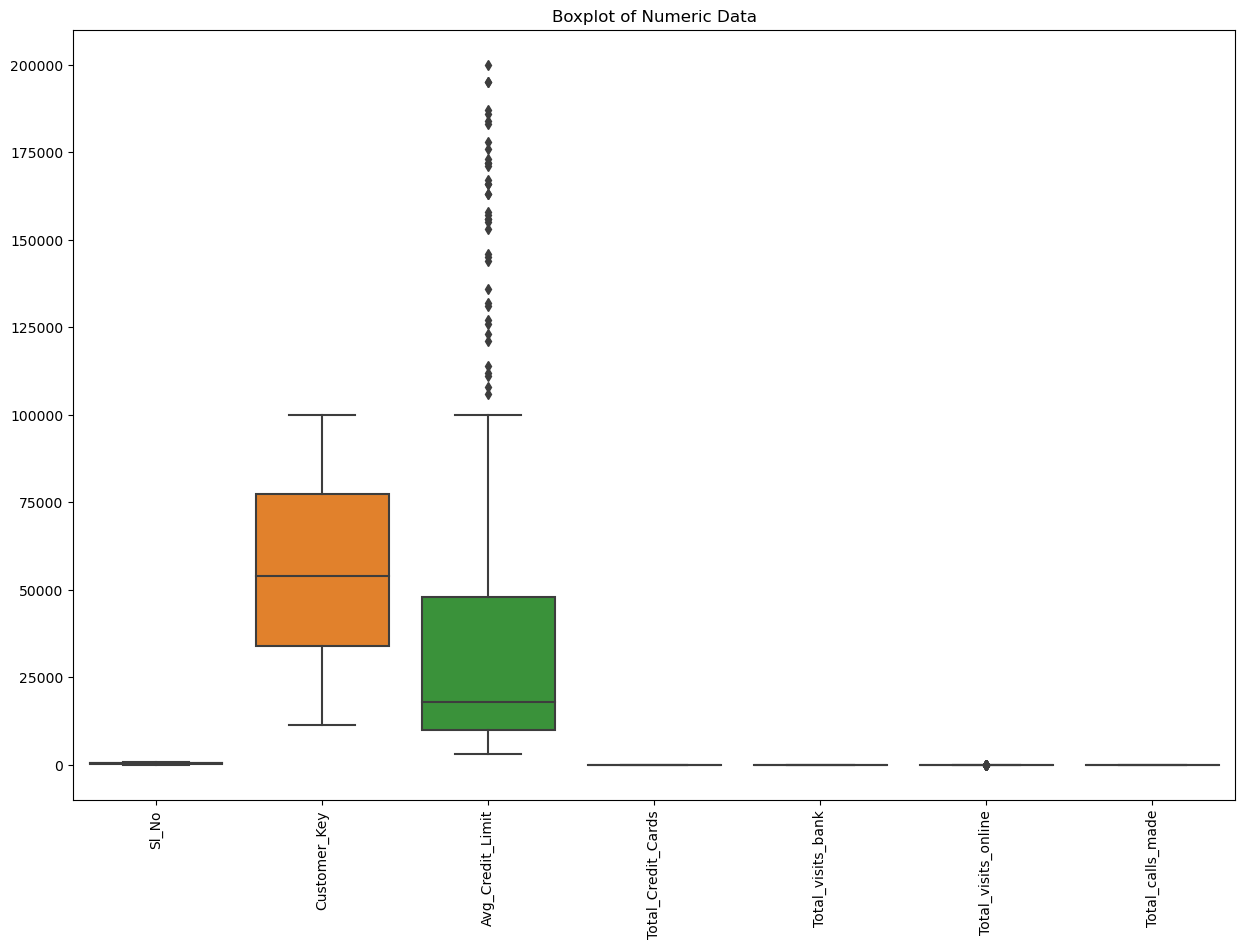

In [5]:
numeric_data = df.select_dtypes(include=['float64', 'int64'])
stat_an=numeric_data.describe()
print(stat_an)
print(df.head(20))
print(df.tail())
plt.figure(figsize=(15, 10))
sns.boxplot(data=numeric_data)
plt.title('Boxplot of Numeric Data')
plt.xticks(rotation=90)  
plt.show()

### Removing Outliers

In [6]:
# Calculate IQR for outlier detection
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows with outliers
data_no_outliers = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

# Calculate the number of rows removed
rows_removed = len(df) - len(data_no_outliers)

print(f"Original dataset size: {df.shape[0]} rows")
print(f"Dataset size after removing outliers: {data_no_outliers.shape[0]} rows")
print(f"Number of rows removed: {rows_removed}")


Original dataset size: 660 rows
Dataset size after removing outliers: 611 rows
Number of rows removed: 49


### Correlation

                        Sl_No  Customer_Key  Avg_Credit_Limit  \
Sl_No                1.000000      0.052886          0.677962   
Customer_Key         0.052886      1.000000          0.068604   
Avg_Credit_Limit     0.677962      0.068604          1.000000   
Total_Credit_Cards   0.739329     -0.010281          0.608860   
Total_visits_bank    0.406438     -0.000560         -0.100312   
Total_visits_online  0.033916      0.022506          0.551385   
Total_calls_made    -0.684125      0.005968         -0.414352   

                     Total_Credit_Cards  Total_visits_bank  \
Sl_No                          0.739329           0.406438   
Customer_Key                  -0.010281          -0.000560   
Avg_Credit_Limit               0.608860          -0.100312   
Total_Credit_Cards             1.000000           0.315796   
Total_visits_bank              0.315796           1.000000   
Total_visits_online            0.167758          -0.551861   
Total_calls_made              -0.651251      

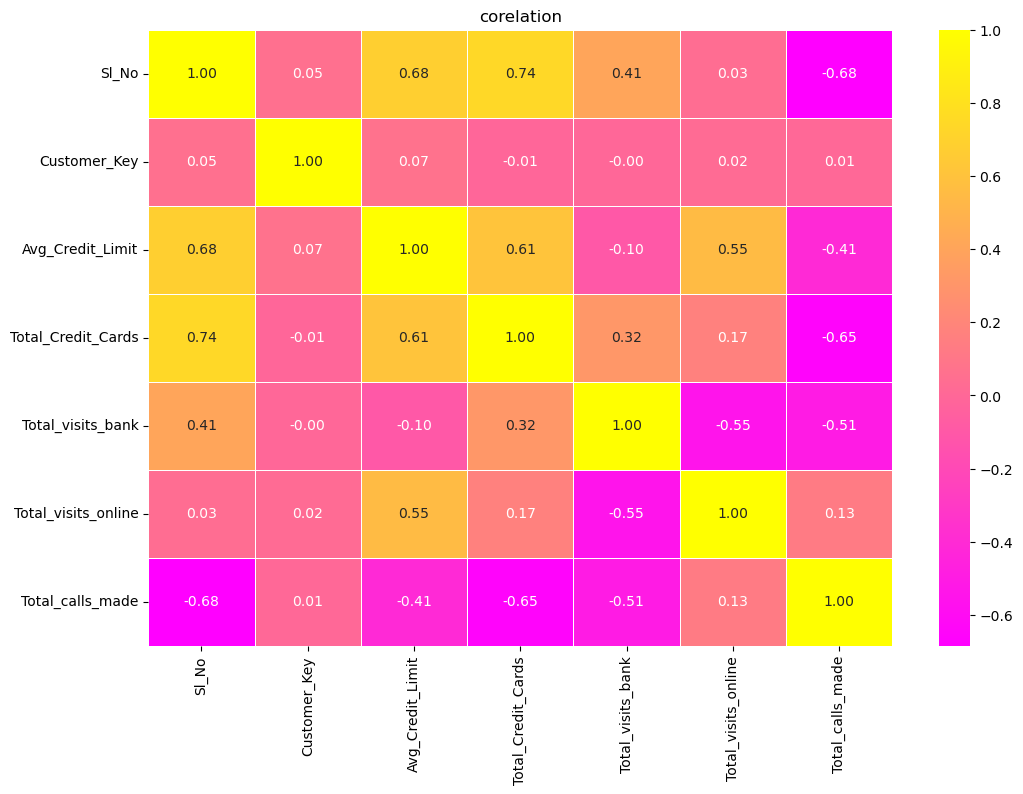

In [7]:
corelation=numeric_data.corr()
print(corelation)
plt.figure(figsize=(12,8))
sns.heatmap(corelation,cmap='spring',annot=True,fmt='.2f',linewidths=0.5)
plt.title("corelation")
plt.show()

In [14]:
import warnings 
warnings.filterwarnings("ignore", category=UserWarning)
X=data_no_outliers[['Avg_Credit_Limit','Total_Credit_Cards']]
# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

  





c:\Users\AKASH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\AKASH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\AKASH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\AKASH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\AKASH\anaconda3\lib\site-packages\sklearn\clust

### Elbow Plot

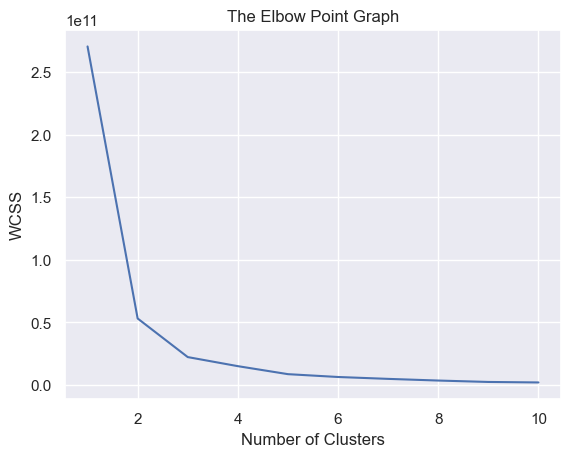

In [15]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### K-Means

In [16]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

c:\Users\AKASH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 1 1 1 2 1 2 2 1
 2 2 2 2 1 2 2 1 1 1 2 1 1 2 2 2 1 2 1 2 1 1 1 1 2 1 1 1 2 1 2 2 2 1 1 2 1
 1 2 2 2 2 2 1 0 2 2 1 1 1 0 2 1 2 2 2 1 2 2 1 2 2 2 0 2 2 1 2 2 2 2 2 1 2
 2 1 1 2 2 2 1 1 2 2 2 1 

### Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
Y = Y.reshape(-1, 1)
scaler = StandardScaler()
Y_scaled = scaler.fit_transform(Y)

### Model Building

Explained Variance Ratio by PCA: [1.]


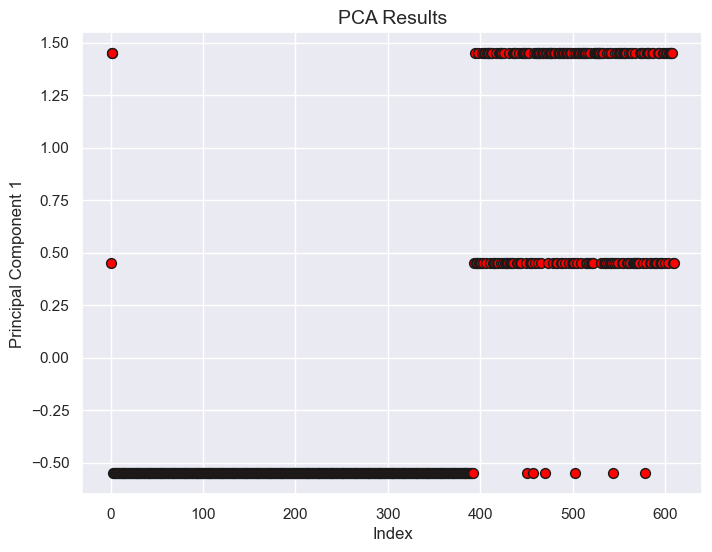

In [18]:
from sklearn.decomposition import PCA


# Apply PCA to reduce dimensionality
pca = PCA(n_components=1)  # Reduce to 2 principal components (since input data has 2 features)
Y_pca = pca.fit_transform(Y)

# Convert PCA results into a DataFrame
pca_df = pd.DataFrame(Y_pca, columns=['Principal Component 1'])

# Display the explained variance ratio
print("Explained Variance Ratio by PCA:", pca.explained_variance_ratio_)

# Plotting the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_df.index, pca_df['Principal Component 1'], c='red', edgecolor='k', s=50)
plt.title('PCA Results', fontsize=14)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Principal Component 1', fontsize=12)
plt.show()



### Silhouette Score

In [19]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.72


# Summary
### K-Means clustering was applied to a dataset containing customer credit behavior, including average credit limit, number of credit cards, bank visits, online visits, and calls made. After standardizing the data, the Elbow Method was used to determine the optimal number of clusters, which appeared to be 4. K-Means was then run with this value, segmenting customers into four distinct groups. These clusters represent different behavioral profiles based on financial activity and engagement levels, aiding in customer segmentation for targeted marketing or service strategies. The distribution of customers across clusters was fairly balanced, indicating meaningful differentiation among the customer segments.

# Conclusion
### K-Means clustering effectively segmented customers into four behavioral groups using credit and interaction data. These clusters can guide personalized strategies, improve customer service, and optimize marketing efforts. The analysis demonstrates the value of unsupervised learning in uncovering patterns and enhancing decision-making in customer relationship management.